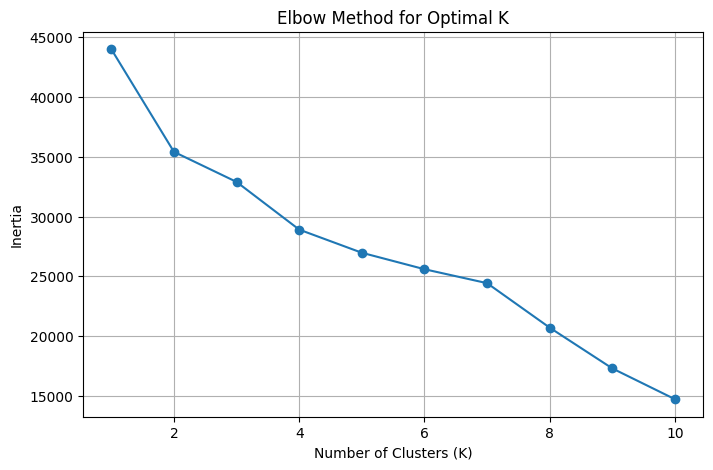

                 ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
Cluster                                                                 
0        1750.333333  193291.147436  795.455128   2.179487   1.038462   
1        1658.865158  122119.899548  151.724887   3.885068   1.002715   
2        1101.367314   59693.586570  112.733010   1.372168   1.031553   
3        3055.842210   36920.458056   96.690413   1.269640   1.006658   

         cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Cluster                                                            
0         1.000000  32292.288462    27.628205        5530.230769   
1         1.043439  43772.394570    19.398190         366.520362   
2         1.000809   6311.116505     8.456311         258.830097   
3         1.000000   4897.208389     6.790280         167.861518   

         Flight_trans_12  Days_since_enroll    Award?  
Cluster                                                
0              16.211538        4688.070

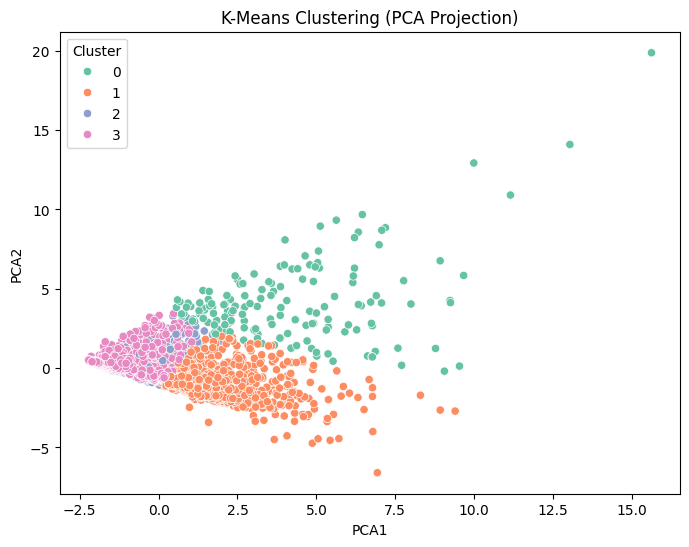

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

# Load data
df = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')

# Drop ID
df_clean = df.drop(columns=['ID#'])

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)

# Elbow method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Apply KMeans with chosen k (e.g., k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Analyze clusters
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

# Optional: visualize clusters using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title('K-Means Clustering (PCA Projection)')
plt.show()


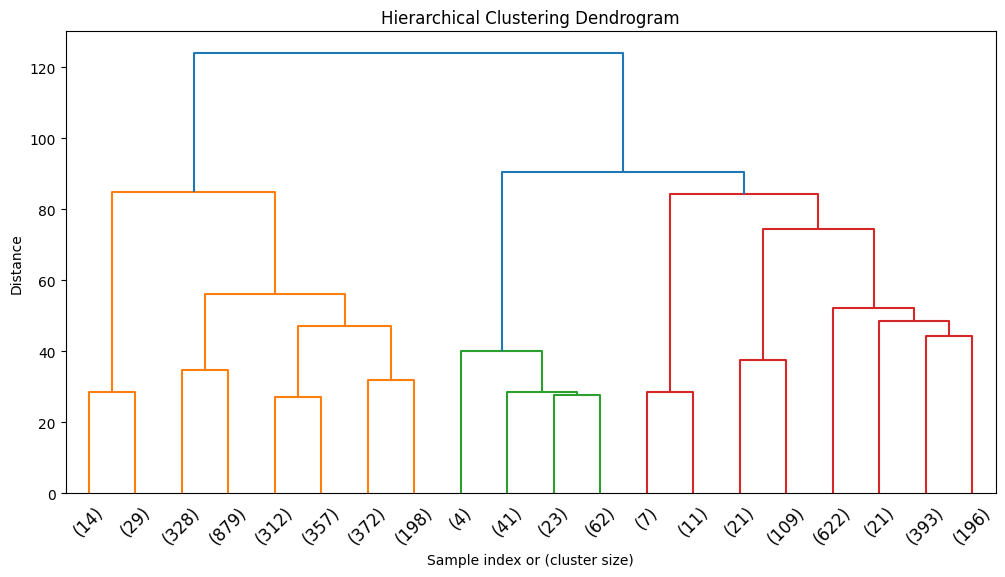

                              ID#        Balance  Qual_miles  cc1_miles  \
Hierarchical_Cluster                                                      
1                     2269.372093   68876.581395   23.255814   1.139535   
2                     2197.204007   46329.336877    9.028618   1.244072   
3                     1765.615385  134880.892308  393.323077   2.430769   
4                     1707.093478  116314.450725  363.839130   3.498551   

                      cc2_miles  cc3_miles   Bonus_miles  Bonus_trans  \
Hierarchical_Cluster                                                    
1                      2.348837   1.000000  14689.837209    17.534884   
2                      1.000000   1.000000   4868.112428     6.907604   
3                      1.000000   1.000000  36582.169231    29.338462   
4                      1.000000   1.035507  37150.356522    18.066667   

                      Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
Hierarchical_Cluster           

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Linkage matrix
linkage_matrix = linkage(scaled_data, method='ward')

# Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=20, leaf_rotation=45, leaf_font_size=12)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.show()

# Assign cluster labels (e.g., 4 clusters)
df['Hierarchical_Cluster'] = fcluster(linkage_matrix, t=4, criterion='maxclust')

# View cluster characteristics
print(df.groupby('Hierarchical_Cluster').mean())


DBSCAN_Cluster
 0    2411
 1    1250
-1     310
 2      15
 3       8
 4       5
Name: count, dtype: int64
Silhouette score not calculated (only one cluster or noise present).


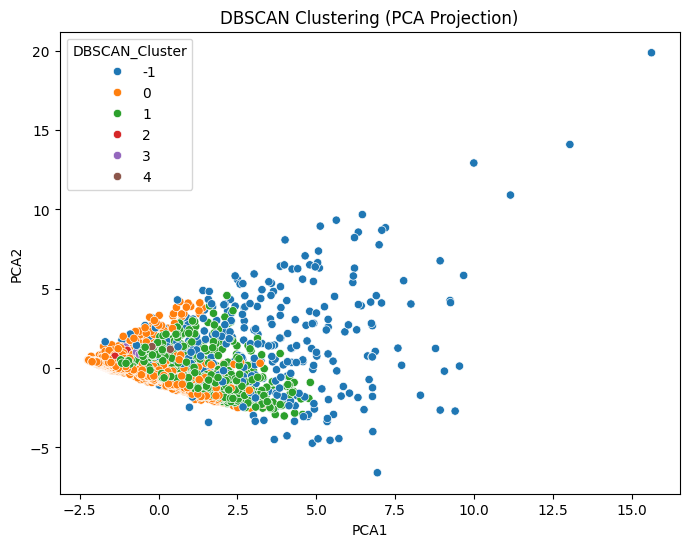

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)  # can tweak eps and min_samples
df['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_data)

# Check cluster labels
print(df['DBSCAN_Cluster'].value_counts())

# Optional: Evaluate clustering (ignores noise points with label -1)
labels = df['DBSCAN_Cluster']
if len(set(labels)) > 1 and -1 not in set(labels):
    score = silhouette_score(scaled_data, labels)
    print("Silhouette Score:", score)
else:
    print("Silhouette score not calculated (only one cluster or noise present).")

# Optional: Visualize with PCA
from sklearn.decomposition import PCA
import seaborn as sns
pca = PCA(n_components=2)
df[['PCA1', 'PCA2']] = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='DBSCAN_Cluster', palette='tab10')
plt.title('DBSCAN Clustering (PCA Projection)')
plt.show()
